In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import sklearn.model_selection

Usando como target a 'Price' y como variables ['MPG.city', 'MPG.highway', 'EngineSize',    'Horsepower', 'RPM', 'Rev.per.mile',   'Fuel.tank.capacity', 'Passengers', 'Length',   'Wheelbase', 'Width', 'Turn.circle', 'Weight'], el objetivo de este ejercicio es elegir el conjunto de variables que mayor influencia tiene sobre el target (asumiendo un modelo lineal). Para esto van a utilizar regularizacion con LASSO y Leave-One-Out cross-validation. El objetivo es reproducir el equivalente de la Figura 6.12 y reportar la combinacion de variables que más influencia tiene. Pueden utilizar sklearn.linear_model.Lasso() y sklearn.model_selection.LeaveOneOut().

In [59]:
data = pd.read_csv('Cars93.csv')
X = np.array(data[['Horsepower', 'Turn.circle']])
Y = np.array(data['Price'].values.reshape(-1,1))

In [70]:
beta = []

alpha = np.logspace(-10, -1, num = 50, base = 10.0)

for i in alpha:

    loo = sklearn.model_selection.LeaveOneOut()
    loo.get_n_splits(X)
    lasso = sklearn.linear_model.Lasso(alpha=i, fit_intercept=True, normalize=False)

    for train_index, test_index in loo.split(X):
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]
        
    lasso.fit(X_train, Y_train)
    beta.append(lasso.coef_)
    
beta = np.array(beta)

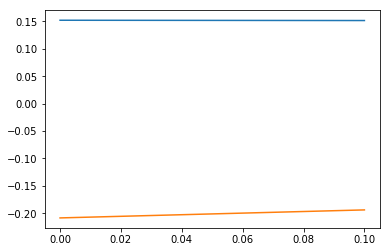

In [71]:
plt.figure()
plt.plot(alpha, beta)